# Programa Ingenias+ Data Science

## ✏️ Ejercitación: Procesamiento y transformación de datos

Esta notebook les permitiria ejercitar los conceptos de Pandas 🐼  y Procesamiento de datos 📊 que aprendimos hasta ahora. Vamos a seguir trabajando con el dataset que contiene datos relativos a [clientes de un centro comercial](https://www.kaggle.com/akram24/mall-customers) que guardamos en la Notebook 10 luego de eliminar valores faltantes y filtrar outliers.

### 🛠 Procesando datos para ML- Feature Engeneering 🔧

Una vez que visualizamos y exploramos el dataset tenemos una idea de como lucen nuestros datos. Es por eso que ahora debemos empezar a preparar nuestros datos para los siguientes pasos según lo que aprendimos de ellos y las preguntas que nos planteamos.

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
df = pd.read_csv('https://raw.githubusercontent.com/GabiMiranda05/data-science-portfolio/refs/heads/main/Ejercicios-python/clientes_mall_transformado.csv')

In [51]:
df.head()

,Unnamed: 0,CustomerID,Genre,Age,annual_income,spending_score,grupo_edad
0,0,1.0,Male,19.0,15.0,39.0,18-25
1,2,3.0,Female,20.0,16.0,6.0,18-25
2,3,4.0,Female,23.0,16.0,77.0,18-25
3,5,6.0,Female,22.0,17.0,76.0,18-25
4,7,8.0,Female,23.0,18.0,94.0,18-25


In [52]:
df.dtypes

,0
Unnamed: 0,int64
CustomerID,float64
Genre,object
Age,float64
annual_income,float64
spending_score,float64
grupo_edad,object


In [53]:
df.describe()

,Unnamed: 0,CustomerID,Age,annual_income,spending_score
count,139.000000,139.000000,139.000000,139.000000,139.000000
mean,99.302158,100.302158,39.654676,60.762590,47.856115
std,57.411388,57.411388,14.078307,26.636464,25.678492
min,0.000000,1.000000,18.000000,15.000000,1.000000
25%,51.500000,52.500000,29.500000,42.500000,28.000000
50%,98.000000,99.000000,37.000000,61.000000,47.000000
75%,145.500000,146.500000,49.000000,77.000000,67.500000
max,199.000000,200.000000,70.000000,137.000000,99.000000


Spending Score: asignado para el comportamiento del cliente en cuanto a gasto va de 1 a 100

#### DESCUBRIENDO NUEVAS VARIABLES

🤔 &nbsp; **_¿Puedo generar nuevas variables a través de las ya presentes? ¿Qué aportaría al entendimiento de los datos la creación de esta/s variable/s?_**

In [54]:
df.grupo_edad.unique()

array(['18-25', '26-35', '56+', '36-45', '46-55', nan], dtype=object)

In [55]:
# Calcula el promedio de gasto por edad
df['Promedio_de_gasto_por_edad'] = df.groupby('Age')['spending_score'].transform('mean')

# Calcula el promedio de gasto por genero
df['Promedio_de_gasto_por_genero'] = df.groupby('Genre')['spending_score'].transform('mean')

# Calcula la relación puntaje de gasto
df['Relación_ingreso_puntaje_de_gasto'] = df['annual_income'] / df['spending_score']

# Crea categoría de edad
grupos = [0, 18, 30, 50, 100]
labels = ['Adolescentes', 'Jovenes', 'Adultos', 'Adultos_Mayores']
df['AgeCategory'] = pd.cut(df['Age'], bins=grupos, labels=labels, right=False)

In [56]:
df.dtypes

,0
Unnamed: 0,int64
CustomerID,float64
Genre,object
Age,float64
annual_income,float64
spending_score,float64
grupo_edad,object
Promedio_de_gasto_por_edad,float64
Promedio_de_gasto_por_genero,float64
Relación_ingreso_puntaje_de_gasto,float64


In [57]:
df.head()

,Unnamed: 0,CustomerID,Genre,Age,annual_income,spending_score,grupo_edad,Promedio_de_gasto_por_edad,Promedio_de_gasto_por_genero,Relación_ingreso_puntaje_de_gasto,AgeCategory
0,0,1.0,Male,19.0,15.0,39.0,18-25,31.00,47.850746,0.384615,Jovenes
1,2,3.0,Female,20.0,16.0,6.0,18-25,49.00,47.861111,2.666667,Jovenes
2,3,4.0,Female,23.0,16.0,77.0,18-25,60.25,47.861111,0.207792,Jovenes
3,5,6.0,Female,22.0,17.0,76.0,18-25,70.00,47.861111,0.223684,Jovenes
4,7,8.0,Female,23.0,18.0,94.0,18-25,60.25,47.861111,0.191489,Jovenes


#### ESTANDARIZACION DE DATOS

🤔 &nbsp; **_¿Crees que tus variables deben ser estandarizadas?_**

Si es así, elige una estrategia y aplicala

🚀 _Recuerda qué_ vimos dos metodos para estandarizar o reescalar variables: `StandardScaler` que usa z-score y `MinMaxScaler` que reescala los datos linealmente. Lee la documentación para [Standard Scaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) y para [Min Max](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html).

- En una situación en la vida real, este paso podríamos realizarlo ahora, ya que ya sabriamos que algoritmo queremos usar o pregunta nos queremos contenstar. En el contexto del curso, en la clase 6 aún no hemos visto aprendizaje automatico. Por lo cual, si no consideraron realizar un scaling esta bien. Podrán hacerlo en el ejercicio de la clase 8, que utilizaremos este dataset.

In [58]:
from sklearn.preprocessing import MinMaxScaler

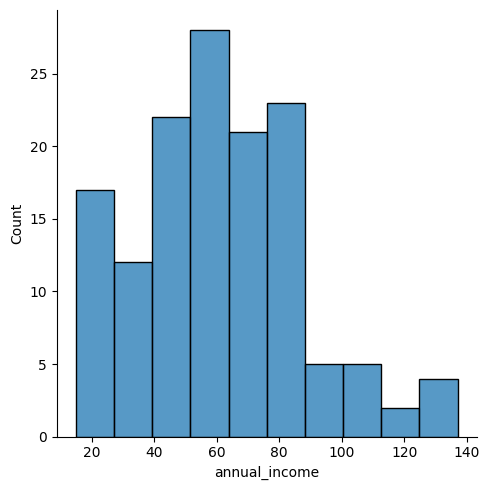

In [59]:
sns.displot(df['annual_income'])

In [60]:
scaler = MinMaxScaler(feature_range=(0, 100), copy=True)

In [61]:
df['annual_income'] = scaler.fit_transform(df[['annual_income']])

In [62]:
df.head()

,Unnamed: 0,CustomerID,Genre,Age,annual_income,spending_score,grupo_edad,Promedio_de_gasto_por_edad,Promedio_de_gasto_por_genero,Relación_ingreso_puntaje_de_gasto,AgeCategory
0,0,1.0,Male,19.0,0.000000,39.0,18-25,31.00,47.850746,0.384615,Jovenes
1,2,3.0,Female,20.0,0.819672,6.0,18-25,49.00,47.861111,2.666667,Jovenes
2,3,4.0,Female,23.0,0.819672,77.0,18-25,60.25,47.861111,0.207792,Jovenes
3,5,6.0,Female,22.0,1.639344,76.0,18-25,70.00,47.861111,0.223684,Jovenes
4,7,8.0,Female,23.0,2.459016,94.0,18-25,60.25,47.861111,0.191489,Jovenes


#### TRANSFORMACION DE VARIABLES

🤔 &nbsp; **¿Tienes variables categoricas en tu dataset? ¿Estan representadas por números o por strings? ¿Crees que debes generar variables dummies o realizar un encoding de las categorias?**

🚀 _Recuerda qué_ hablamos de varias funciones para poder llevar a cabo estas transformaciones. Algunas de ellas como `get_dummies` y `map` pertenecen a `pandas`, mientras que otras como `LabelEncoder` y `OneHotEncoder` son parte de `sklearn`.

Si queres saber más, chequea la documentación de [get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html), [map](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.map.html), [LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) y [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)

- Hay variables categóricas representadas por strings tal como el género y el ageCategory

In [63]:
from sklearn.preprocessing import OneHotEncoder

In [64]:
gender_encoder = OneHotEncoder(sparse_output=False) # No queremos matriz dispersa

In [65]:
gender_encoded = gender_encoder.fit_transform(df[['Genre']])

In [66]:
gender_encoded_df = pd.DataFrame(gender_encoded, columns=gender_encoder.get_feature_names_out(['Genre']), index=df.index)

In [67]:
df = pd.concat([df, gender_encoded_df], axis=1)

In [68]:
df.drop('Genre', axis=1, inplace=True)

In [69]:
df['AgeCategory_Ordinal'] = df['AgeCategory'].cat.codes
df.drop('AgeCategory', axis=1, inplace=True)
df.drop('grupo_edad', axis=1, inplace=True)

In [70]:
df.head()

,Unnamed: 0,CustomerID,Age,annual_income,spending_score,Promedio_de_gasto_por_edad,Promedio_de_gasto_por_genero,Relación_ingreso_puntaje_de_gasto,Genre_Female,Genre_Male,AgeCategory_Ordinal
0,0,1.0,19.0,0.000000,39.0,31.00,47.850746,0.384615,0.0,1.0,1
1,2,3.0,20.0,0.819672,6.0,49.00,47.861111,2.666667,1.0,0.0,1
2,3,4.0,23.0,0.819672,77.0,60.25,47.861111,0.207792,1.0,0.0,1
3,5,6.0,22.0,1.639344,76.0,70.00,47.861111,0.223684,1.0,0.0,1
4,7,8.0,23.0,2.459016,94.0,60.25,47.861111,0.191489,1.0,0.0,1


In [71]:
df.dtypes

,0
Unnamed: 0,int64
CustomerID,float64
Age,float64
annual_income,float64
spending_score,float64
Promedio_de_gasto_por_edad,float64
Promedio_de_gasto_por_genero,float64
Relación_ingreso_puntaje_de_gasto,float64
Genre_Female,float64
Genre_Male,float64


#### 💾 &nbsp; GUARDANDO EL ARCHIVO PARA LOS SIGUIENTES PASOS

1) **Utiliza la función `.to_csv()` para guardar tu dataset**.

In [72]:
# Guardar los cambios en archivo csv
df.to_csv('clientes_mall_transformado_final.csv', index=False)